<a href="https://colab.research.google.com/github/mjkimcs/portfolio/blob/main/%EC%98%A4%EB%8B%B5%EB%85%B8%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
fig = plt.figure(figsize=(8,10))

## 범주형 데이터

In [ ]:
sns.countplot(y='컬럼명', data=df.fillna('n/a'), order=df.fillna('n/a')['컬럼명'].value_counts().index)

In [ ]:
sns.countplot(x='컬럼명', data=df[df['컬럼명']>=50]);

In [ ]:
# 그 하나의 컬럼에 항목이 너무 많으면 len 사용
# 범주형 데이터에서 소수 범주를 others로 대체

counts = df['컬럼명'].fillna('others').value_counts()
plt.plot(range(len(counts)), counts)
plt.plot(range(len(counts[:20])), counts[:20]) # 상위 20개만 보기
df['컬럼명'] = df['컬럼명'].apply(lambda s: s if s not in counts[20:] else 'others')

In [ ]:
# 국가별 행복순위 5개년 시각화

fig = plt.figure(figsize=(10, 50))

rank2020 = rank_table['2020'].dropna() # rank_table : df / rank2020 : 인덱스국가 컬럼행복지수인 시리즈형
for country in rank2020.index:  # rank2020.index : 국가
  t = rank_table.loc[country].dropna() # 해당국가를 찾아서 5개년 행복지수
  plt.plot(t.index, t, '.-') # t.index : 년도

plt.xlim(['2015', '2020']) # x축 limit 좌우 여백없이 딱맞게
# plt.xlim(-100, 100)
plt.ylim([0, rank_table.max().max() + 1])

plt.yticks(rank2020, rank2020.index) # (tick숫자, label국가) / y축 라벨을 국가이름으로

ax = plt.gca() # get current axes
ax.invert_yaxis() # 위아래로 뒤집기

ax.yaxis.set_label_position('right') # label을 오른쪽으로
ax.yaxis.tick_right() # tick도 오른쪽으로

plt.tight_layout() # 좀 더 예쁘게 그려줌
plt.show()

In [ ]:
# 국가별 행복점수를 구성하는 요소 barplot

df_2020 = df_all[df_all['year'] == '2020']
df_2020 = df_2020.loc[df_2020.index[:20]]

d = df_2020[df_2020.columns[4:]].cumsum(axis=1) # 누적합
d = d[d.columns[::-1]] # 그리는 순서 변경하기 위해 컬럼 전환

d['country'] = df_2020['country'] # country 열 추가

fig = plt.figure(figsize=(6, 8))
sns.set_color_codes('muted') # 색깔 톤다운
colors = ['r', 'g', 'b', 'c', 'm', 'y']
for i, k in enumerate(d.columns[:-1]):  # i는 0,1,2,… / k는 컬럼명
  sns.barplot(x=k, y='d.columns에서 뺐던 그 컬럼', data=d, color=colors[i], label=k) # label은 legend를 위한 것

plt.legend(loc='lower right') # loc: 범례 위치지정
plt.title('Top 20 Happiness Scores in Details') #sns.countplot(x='컬럼명', data=df).set_title('Top 20 Happiness Scores in Details')
plt.xlabel('Happiness Score')
sns.despine(left=True, bottom=True) # 프레임 테두리 선 제거

In [ ]:
sns.boxplot(x='컬럼명', data=df)

In [ ]:
sns.boxplot(x='컬럼명', y='컬럼명', data=df)
plt.xticks(rotation=90)
plt.show()

## 수치형 데이터

In [ ]:
sns.histplot(x='컬럼명', data=df, bins=30, kde=True)

In [ ]:
sns.histplot(x='컬럼명', hue='컬럼명', kde=True, data=df)

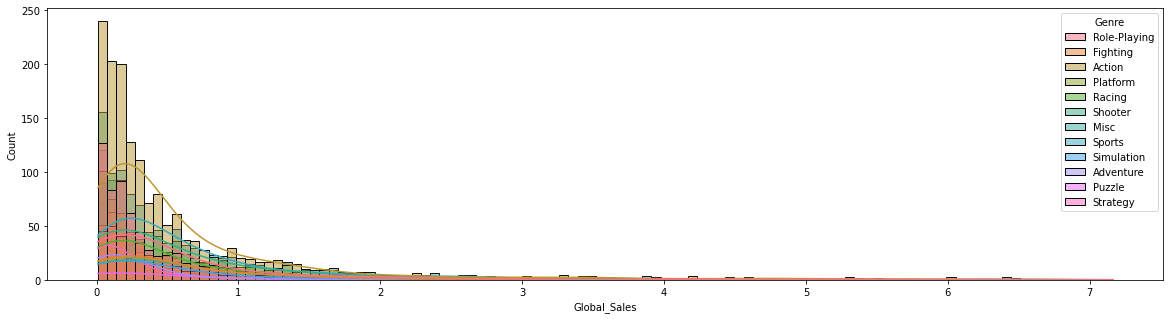

In [ ]:
sns.histplot(x='Global_Sales', hue='Genre', kde=True, data=df)

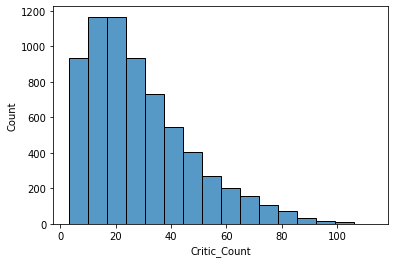

In [ ]:
sns.histplot(x='Critic_Count', data=df, bins=16)

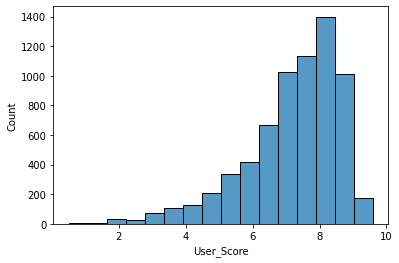

In [ ]:
sns.histplot(data=df['User_Score'].apply(float), bins=16) # User_Score 값을 string으로 인식하므로 float을 씌워서 숫자로 바꿔줌

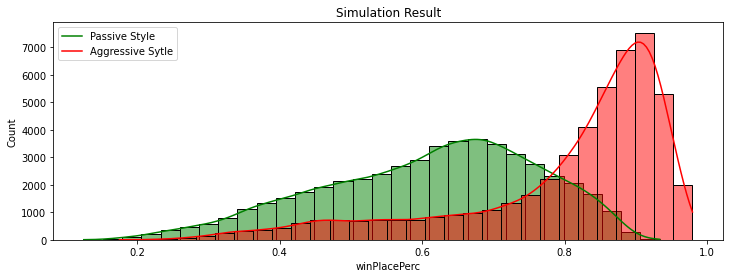

In [ ]:
plt.figure(figsize=(12,4))
sns.histplot(data=df1, bins=30, kde=True, color='g')
sns.histplot(data=df2, bins=30, kde=True, color='r')
plt.title("제목")
plt.xlabel("x축 제목"")
plt.legend(["df1 제목", "df2 제목"])

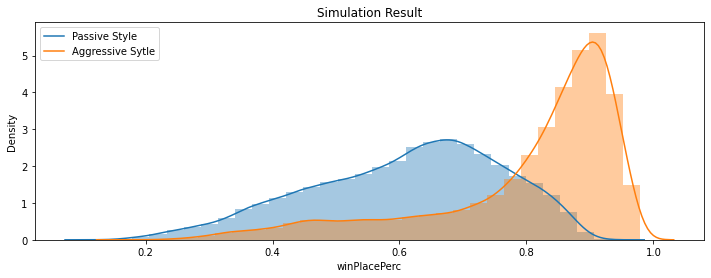

In [ ]:
plt.figure(figsize=(12,4))
sns.distplot(df1, bins=30)
sns.distplot(df2, bins=30)
plt.title("Simulation Result")
plt.xlabel("winPlacePerc")
plt.legend(["Passive Style", "Aggressive Sytle"])

In [ ]:
sns.distplot(df['컬럼명'], bins=10);

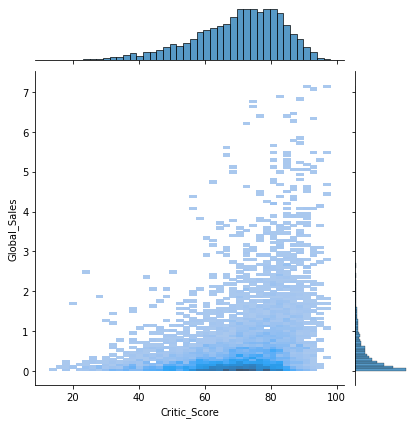

In [ ]:
sns.jointplot(x='Critic_Score', y='Global_Sales', data=df, kind='hist') # kind=hex는 다른 스타일

In [ ]:
err = (pred - y_test) / y_test * 100  # 시리즈 자료형
sns.histplot(err)

In [ ]:
sns.rugplot(x='컬럼명', data=df, height=1) # 아웃라이어 판단 시 용이

In [ ]:
df['컬럼명'].hist();

In [ ]:
df[df['Global_Sales'] > 80] # inplace=True 안써줘도 적용됨

## 내가 원하는 df 만들기

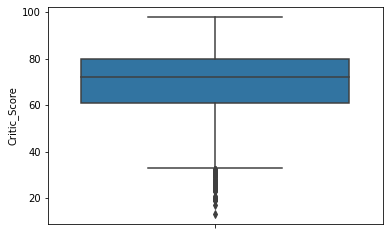

In [ ]:
sns.boxplot(y='Critic_Score', data=df)

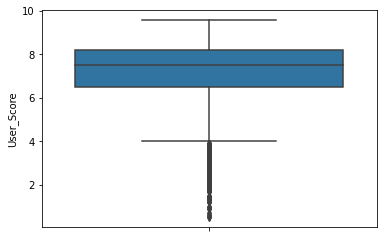

In [ ]:
sns.boxplot(y='User_Score', data=df)

In [ ]:
df['Critic_Score']

106      96.0
109      91.0
111      92.0
113      82.0
114      88.0
         ... 
16667    46.0
16677    81.0
16696    80.0
16700    61.0
16706    60.0
Name: Critic_Score, Length: 6487, dtype: float64

In [ ]:
type(df['Critic_Score'])

pandas.core.series.Series

In [ ]:
df[['Critic_Score']]

,Critic_Score
106,96.0
109,91.0
111,92.0
113,82.0
114,88.0
...,...
16667,46.0
16677,81.0
16696,80.0
16700,61.0


In [ ]:
type(df[['Critic_Score']])

pandas.core.frame.DataFrame

In [ ]:
critic_score = df[['Critic_Score']].copy()
critic_score.rename({'Critic_Score': 'Score'}, axis=1, inplace=True) # 컬럼이름 바꾸기 1탄
critic_score

,Score
106,96.0
109,91.0
111,92.0
113,82.0
114,88.0
...,...
16667,46.0
16677,81.0
16696,80.0
16700,61.0


In [ ]:
pd.DataFrame(df.reset_index()[['Date', 'Korea, South']].to_numpy(), columns=['ds', 'y'])  # 컬럼이름 바꾸기 2탄

In [ ]:
critic_score['ScoreBy'] = 'Critics' # ScoreBy 컬럼 생성 후 값을 "Critics"라고 채워넣기
critic_score

,Score,ScoreBy
106,96.0,Critics
109,91.0,Critics
111,92.0,Critics
113,82.0,Critics
114,88.0,Critics
...,...,...
16667,46.0,Critics
16677,81.0,Critics
16696,80.0,Critics
16700,61.0,Critics


In [ ]:
user_score = df[['User_Score']]
user_score

,User_Score
106,9.1
109,8.9
111,9.1
113,8.6
114,8.5
...,...
16667,2.4
16677,8.8
16696,7.6
16700,5.8


In [ ]:
user_score = df[['User_Score']].copy() * 10
user_score

,User_Score
106,91.0
109,89.0
111,91.0
113,86.0
114,85.0
...,...
16667,24.0
16677,88.0
16696,76.0
16700,58.0


In [ ]:
user_score = df[['User_Score']].copy() * 10
user_score.rename({'User_Score': 'Score'}, axis=1, inplace=True)
user_score['ScoreBy'] = 'Users'

In [ ]:
scores = pd.concat([critic_score, user_score])
scores

,Score,ScoreBy
106,96.0,Critics
109,91.0,Critics
111,92.0,Critics
113,82.0,Critics
114,88.0,Critics
...,...,...
16667,24.0,Users
16677,88.0,Users
16696,76.0,Users
16700,58.0,Users


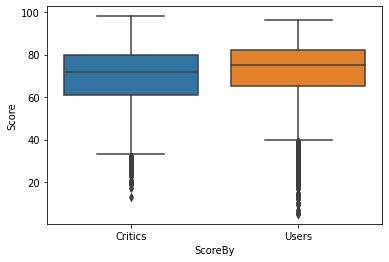

In [ ]:
sns.boxplot(x='ScoreBy', y='Score', data=scores)

## 상관성 시각화

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='YlOrRd');

In [ ]:
sns.pairplot(df) # scatter로 보기

## 찾기 : loc 등

In [ ]:
# 그 하나의 컬럼 안에 other이 있는 칸은 모두 others로 바꾸기
df.loc[df['컬럼명'] == 'other', '컬럼명'] = 'others'

In [ ]:
# 그 컬럼에서 값이 없는 행을 반환
df[df['컬럼명'].isna()]

In [ ]:
df.loc['하나의 행에 해당하는 인덱스 이름']

In [ ]:
# 여러개의 df를 합친 df_all
# df로 반환

df_all[df_all['year'] == '2020']

## lambda 함수

In [ ]:
# availability_365가 0 이거나 아닌 것 따로 컬럼 만들기
df['is_avail_zero'] = df['availability_365'].apply(lambda x: 'Zero' if x==0 else 'Nonzero')

In [ ]:
df['review_exists'] = df['reviews_per_month'].isna().apply(lambda x: 'No' if x is True else 'Yes')

In [ ]:
# 상위 10개만 남기고 나머지는 others로 편입시킴

n_cat = 10
counts = df['컬럼명'].fillna('others').value_counts()
df['컬럼명'] = df['컬럼명'].apply(lambda s: s if str(s) not in counts.index[n_cat:] else 'others')

In [ ]:
# 속도개선

n_cat = 10
others = counts.index[n_cat:]
df['컬럼명'] = df['컬럼명'].apply(lambda s: s if str(s) not in others else 'others')

## drop

In [ ]:
# 값이 True인 행 제거

df.drop(df[df['컬럼명']==True].index, inplace=True)

In [ ]:
# 열 통째로 제거

df.drop(['컬럼명', '컬럼명'], axis=1, inplace=True)

## 여러 개 DataFrame 합치기

In [ ]:
df_all = pd.concat([df1, df2])

In [ ]:
df = dict()
df['2015'] = pd.read_csv('2015.csv')
df['2016'] = pd.read_csv('2016.csv')
df['2017'] = pd.read_csv('2017.csv')
df['2018'] = pd.read_csv('2018.csv')
df['2019'] = pd.read_csv('2019.csv')
df['2020'] = pd.read_csv('2020.csv')

## 기타

In [ ]:
# 각 열마다 최대값을 반환
df.max()

In [ ]:
colors = ['r', 'g', 'b'][::-1]
colors

['b', 'g', 'r']

In [ ]:
# matchId로 group을 지어서 count를 새로운 컬럼에 반환

df['players_num'] = df.groupby("matchId")["matchId"].transform("count")

In [ ]:
# 자료가 너무 많아서 value_counts() 결과가 생략된 경우 하나하나씩 보기

for index, num in zip(df['players_num'].value_counts().index, df['players_num'].value_counts()):
  print(index, num)

In [ ]:
if ("신지모루" in name.string) or ("에이지" in name.string) or ("20" in name.string):
    continue

if (i == "관람객") or (i == "제작사") or (i == "감독"):
    continue

In [ ]:
except_keyword = ["신지모루", "에이지", "20"]
all = soup.select("li.search-product")
for i in all:
    name = i.select_one("div.name")
    for keword in except_keyword:
        if keword in name.string:
            continue

In [ ]:
f = ['컬럼명', '컬럼명', '컬럼명']
df[f][0:11]

In [ ]:
df['컬럼명'] = (df['컬럼명'] == 0) & (df['컬럼명'] > 0) # T/F로 반환

In [ ]:
# 열 생략없이 다 보기

pd.options.display.max_columns = None
display(df)

In [ ]:
# Id라는 글자가 들어간 컬럼만 보여줌

df.filter(regex="Id")

In [ ]:
# 숫자와 문자가 섞인 값은 범주형으로 바꿔준 뒤 0부터 새로운 값 부여

df['matchId'] = df['matchId'].astype('category')
df['matchId_cat'] = df['matchId'].cat.codes